# 이변량 데이터 검색

## 데이터 불러오기

In [13]:
import pandas as pd

df = pd.read_csv('../datasets/빅분기 실기 데이터/Ex_CEOSalary.csv', encoding='utf-8')

In [25]:
df['industry'] = df['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])

## 데이터 상관관계 파악

In [26]:
df.corr()

C:\Users\qkrtj\AppData\Local\Temp\ipykernel_7052\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [27]:
df.corr(method='pearson')

C:\Users\qkrtj\AppData\Local\Temp\ipykernel_7052\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [28]:
df.corr(method='spearman')

C:\Users\qkrtj\AppData\Local\Temp\ipykernel_7052\1222267885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [29]:
df.corr(method='kendall')

C:\Users\qkrtj\AppData\Local\Temp\ipykernel_7052\1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


## 산점도를 이용해 변수간의 관계 파악
- sales와 salary는 이상치로 인해 관계가 왜곡되고 있음

In [30]:
import matplotlib.pyplot as plt

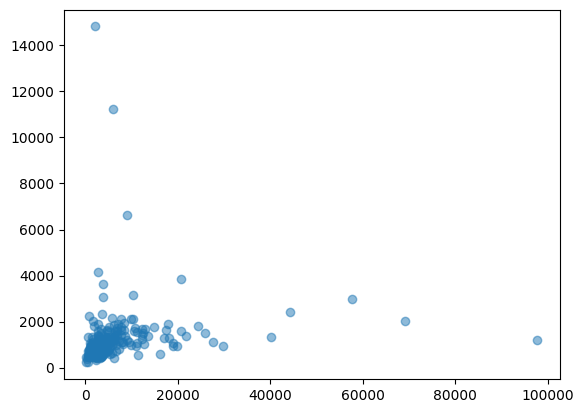

In [31]:
plt.scatter(df['sales'], df['salary'], alpha=0.5)

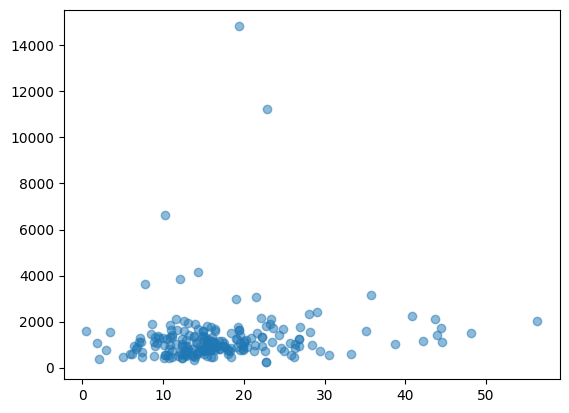

In [32]:
plt.scatter(df['roe'], df['salary'], alpha=0.5)
plt.show()

## 산업 범주별로 종속변수인 salary의 평균 및 기술통계량 파악
- Finance의 연봉이 1,722로 높은 반면, 기타 산업은 627로 낮은 것 확인 가능

In [33]:
df.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

# 이상치 처리

## boxplot으로 이상치 확인
- return_type : 'axes', 'dict', 'both'

<AxesSubplot: >

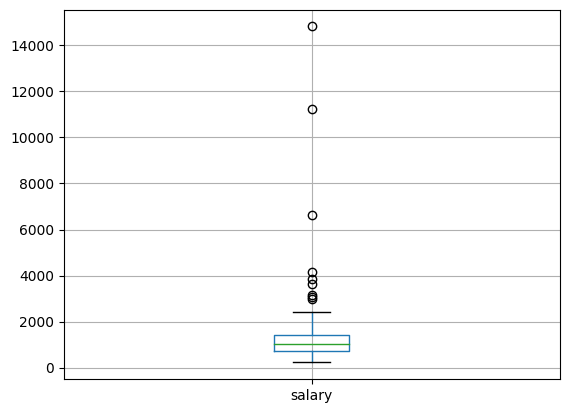

In [39]:
df.boxplot(column='salary')

<AxesSubplot: >

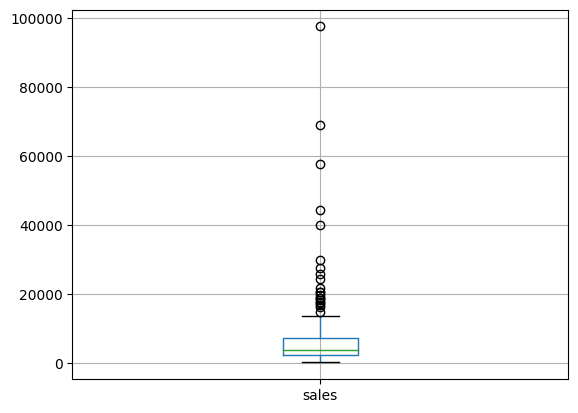

In [40]:
df.boxplot(column='sales')

<AxesSubplot: >

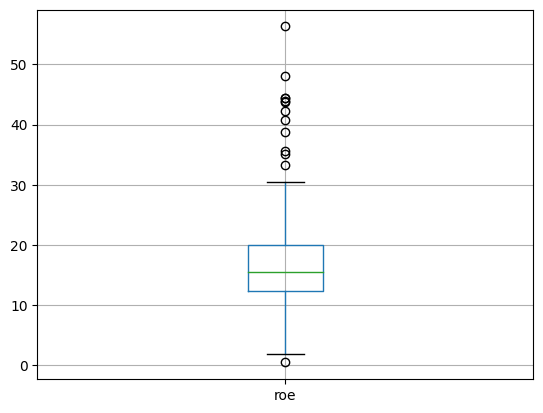

In [41]:
df.boxplot(column='roe')

## salary 변수 이상치 처리

In [44]:
q1_salary = df['salary'].quantile(0.25)
q3_salary = df['salary'].quantile(0.75)
iqr_salary = q3_salary-q1_salary
iqr_salary

671.0

<AxesSubplot: >

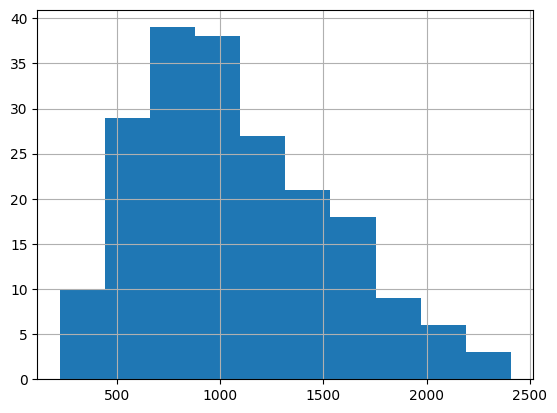

In [55]:
df = df[(df['salary']<q3_salary+iqr_salary*1.5)&(df['salary']>q1_salary-iqr_salary*1.5)]
df['salary'].hist()

## sales 변수 이상치 처리

In [53]:
q1_sales = df['sales'].quantile(0.25)
q3_sales = df['sales'].quantile(0.75)
iqr_sales = q3_sales-q1_sales
iqr_sales

4966.6999511718695

In [56]:
df = df[(df['sales']<q3_sales+iqr_sales*1.5)&(df['sales']>q1_sales-iqr_sales*1.5)]

## roe 변수 이상치 처리

In [58]:
q1_sales = df['roe'].quantile(0.25)
q3_sales = df['roe'].quantile(0.75)
iqr_sales = q3_sales-q1_sales
iqr_sales

7.6000003814697

In [59]:
df = df[(df['roe']<q3_sales+iqr_sales*1.5)&(df['roe']>q1_sales-iqr_sales*1.5)]

## 이상치 모두 제거 후 히스토그램 
- bins : 히스토그램의 한 구간
- roe 변수에는 아직 이상치 존재

array([[<AxesSubplot: title={'center': 'salary'}>,
        <AxesSubplot: title={'center': 'sales'}>],
       [<AxesSubplot: title={'center': 'roe'}>, <AxesSubplot: >]],
      dtype=object)

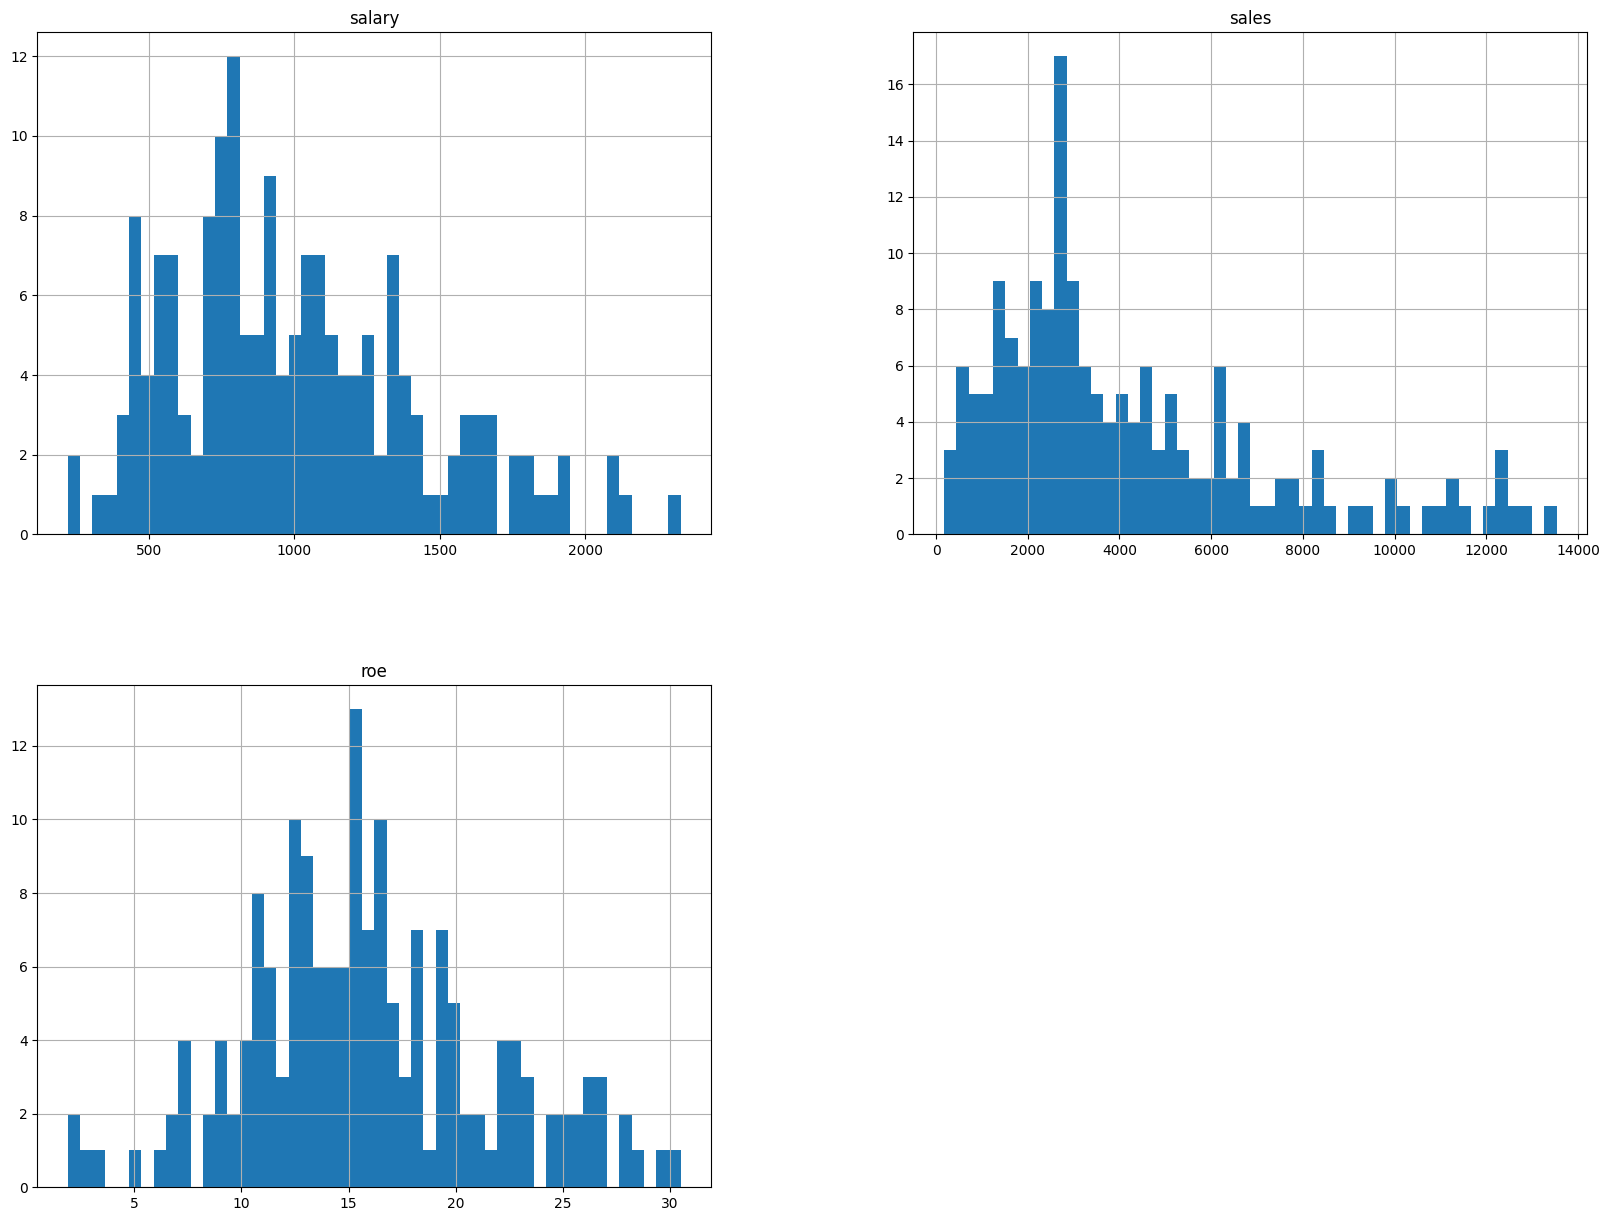

In [63]:
df.hist(bins=50, figsize=(20,15))

## 이상치 처리 후 상관관계 확인

In [64]:
df.corr()

C:\Users\qkrtj\AppData\Local\Temp\ipykernel_7052\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,salary,sales,roe
salary,1.000000,0.512813,0.158599
sales,0.512813,1.000000,-0.075684
roe,0.158599,-0.075684,1.000000


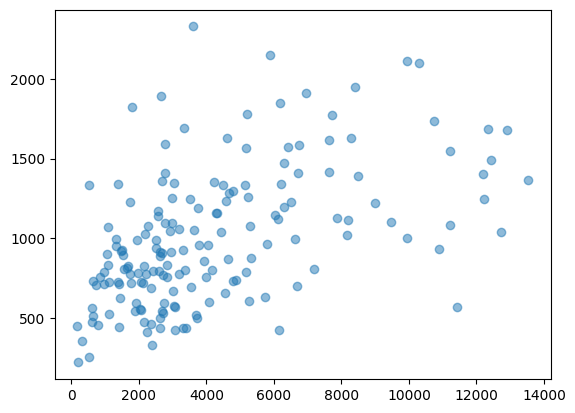

In [65]:
plt.scatter(df['sales'], df['salary'], alpha=0.5)

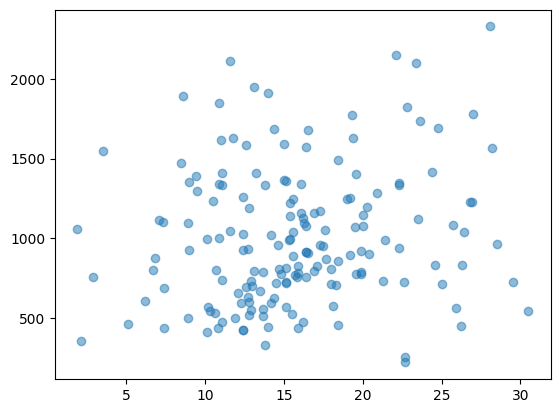

In [66]:
plt.scatter(df['roe'], df['salary'], alpha=0.5)

# 변수 변환

## 로그 변환

In [70]:
import numpy as np

data = pd.read_csv('../datasets/빅분기 실기 데이터/Ex_CEOSalary.csv', encoding='utf-8')
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])

data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669


## 변수 간 상관관계 파악

array([[<AxesSubplot: title={'center': 'salary'}>,
        <AxesSubplot: title={'center': 'sales'}>],
       [<AxesSubplot: title={'center': 'roe'}>,
        <AxesSubplot: title={'center': 'log_salary'}>],
       [<AxesSubplot: title={'center': 'log_sales'}>,
        <AxesSubplot: title={'center': 'log_roe'}>]], dtype=object)

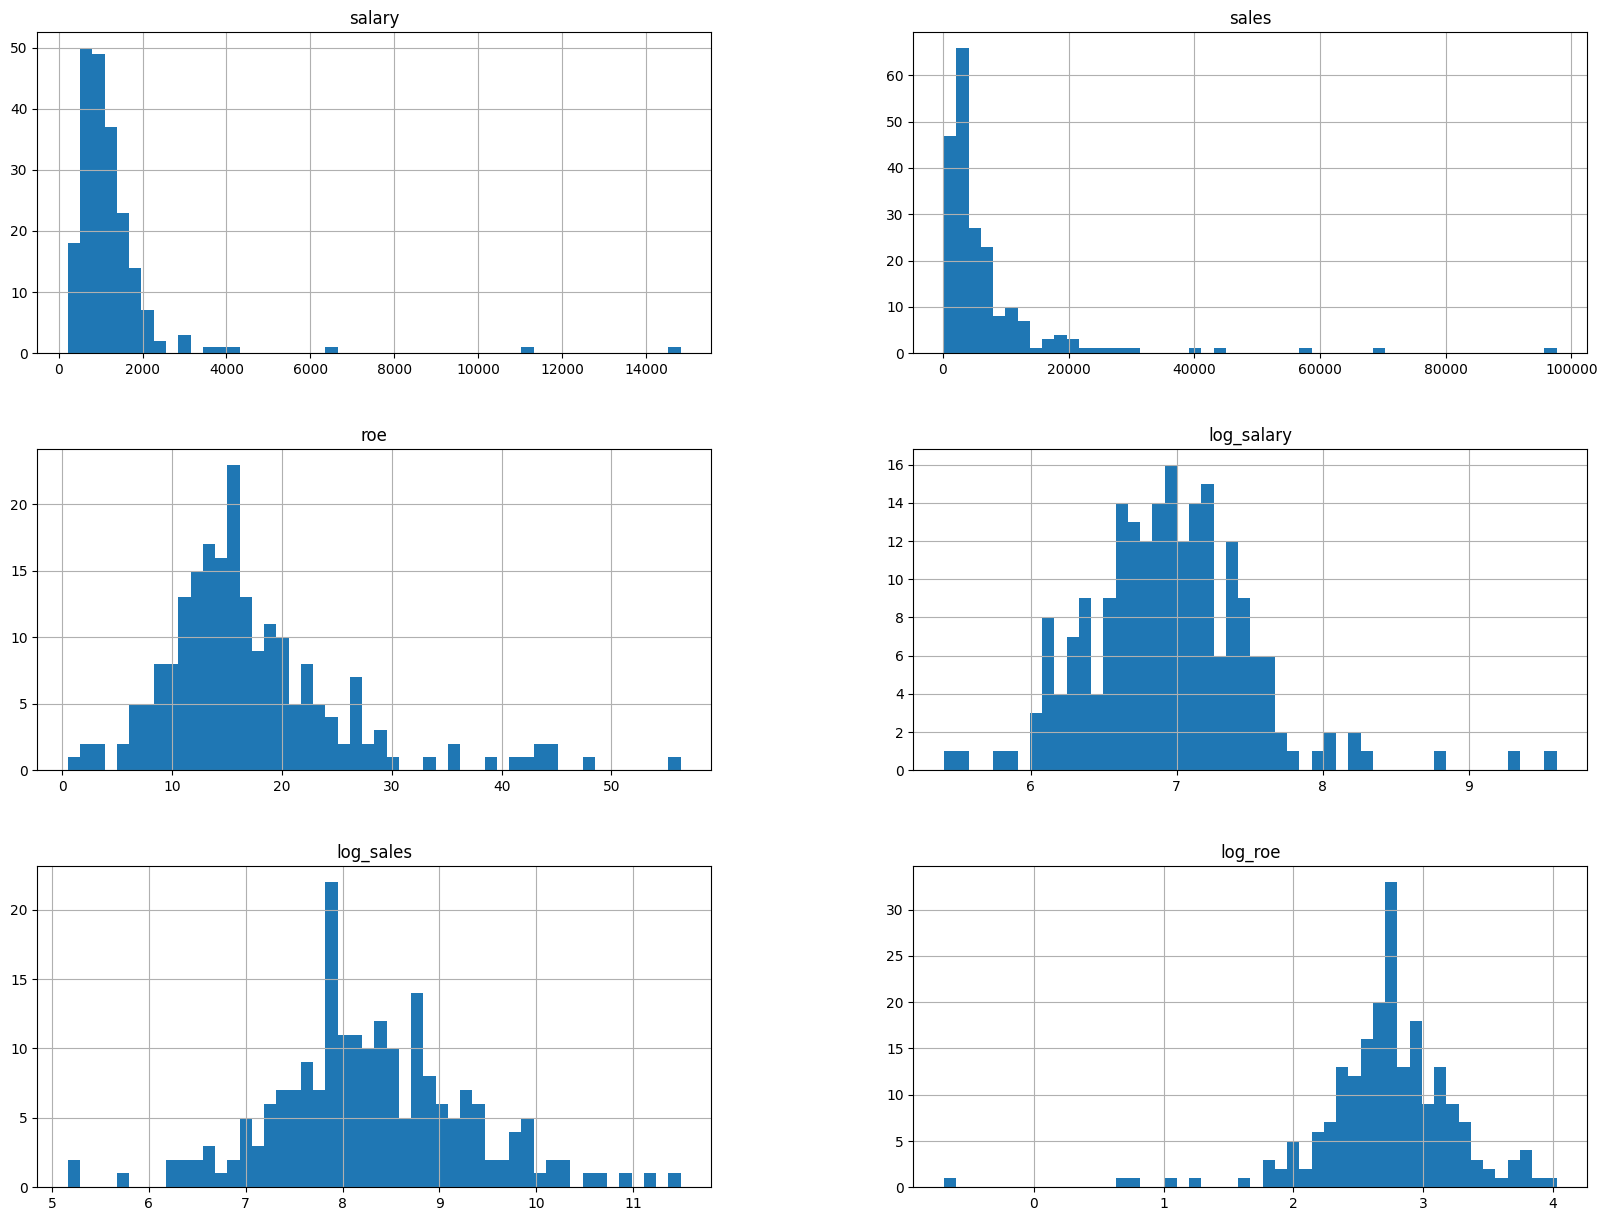

In [71]:
data.hist(bins=50, figsize=(20,15))

In [72]:
data.corr()

C:\Users\qkrtj\AppData\Local\Temp\ipykernel_7052\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


## 제곱근 변환

In [73]:
data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])
data['sqrt_roe'] = np.sqrt(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


## 변수 간 상관관계 파악

array([[<AxesSubplot: title={'center': 'salary'}>,
        <AxesSubplot: title={'center': 'sales'}>,
        <AxesSubplot: title={'center': 'roe'}>],
       [<AxesSubplot: title={'center': 'log_salary'}>,
        <AxesSubplot: title={'center': 'log_sales'}>,
        <AxesSubplot: title={'center': 'log_roe'}>],
       [<AxesSubplot: title={'center': 'sqrt_salary'}>,
        <AxesSubplot: title={'center': 'sqrt_sales'}>,
        <AxesSubplot: title={'center': 'sqrt_roe'}>]], dtype=object)

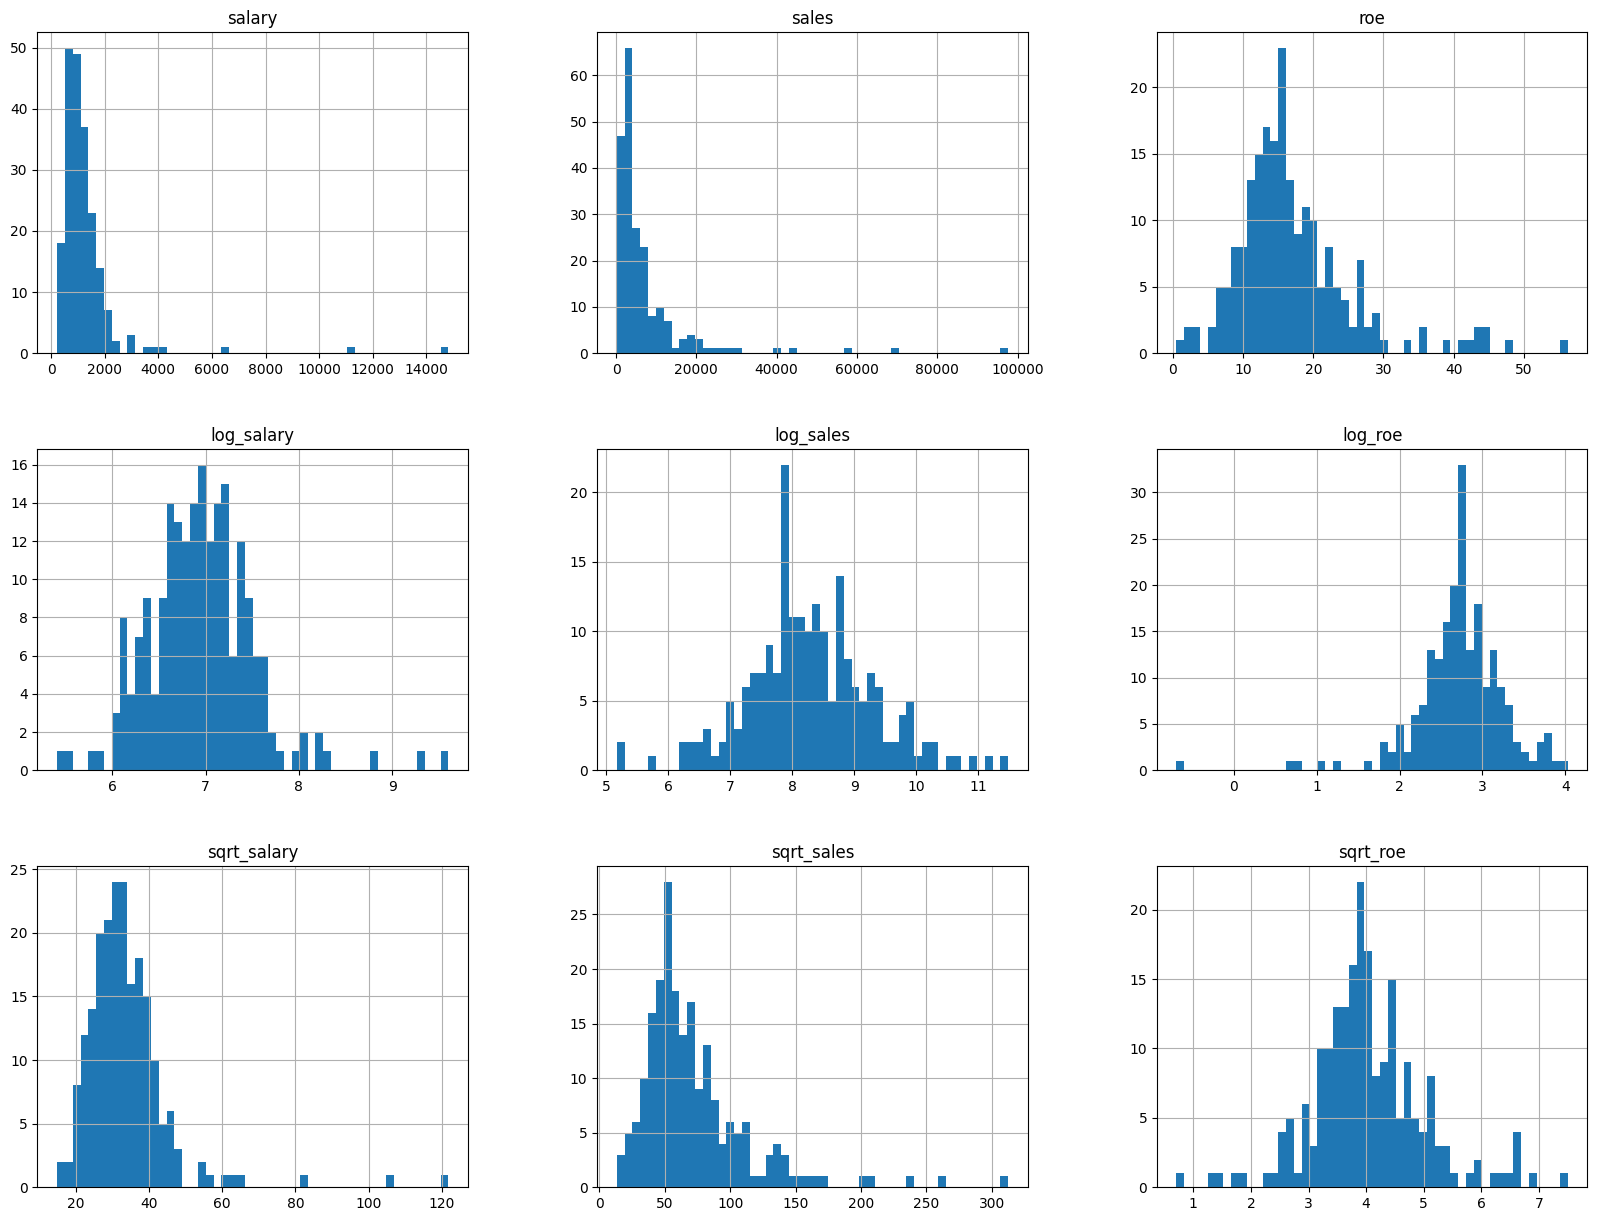

In [74]:
data.hist(bins=50, figsize=(20,15))

In [75]:
data.corr()

C:\Users\qkrtj\AppData\Local\Temp\ipykernel_7052\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000
